In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import ML_user_def_functions as ML_fns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import statsmodels

In [27]:
path_to_second_data     =       "/home/jwalitnpanchal/college_work/sem10/ML_AI/gdp_data/sorghum_annual_supply_disappearance.csv"
df2                     =       pd.read_csv(path_to_second_data)
print(df2,"\n",df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marketing_year        49 non-null     object 
 1   period                49 non-null     object 
 2   beginning_stocks      49 non-null     float64
 3   production            49 non-null     float64
 4   imports               49 non-null     float64
 5   total_supply          49 non-null     float64
 6   feed_and_residual     49 non-null     float64
 7   food_seed_industrial  49 non-null     float64
 8   exports               49 non-null     float64
 9   total_domestic_use    49 non-null     float64
 10  total_use             49 non-null     float64
 11  ending_stocks         49 non-null     float64
dtypes: float64(10), object(2)
memory usage: 4.7+ KB
   marketing_year               period  beginning_stocks  production  imports  \
0         1976/77  MY September-August           

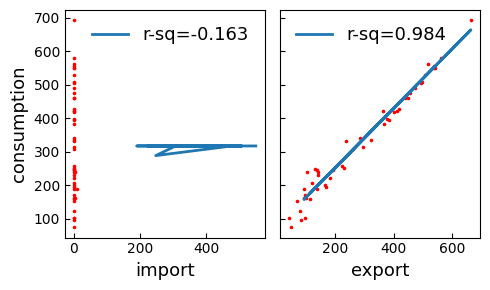

In [28]:
from sklearn.model_selection import train_test_split
############## multiple linear reg. ###################################
path_to_second_data     =       "/home/jwalitnpanchal/college_work/sem10/ML_AI/gdp_data/sorghum_annual_supply_disappearance.csv"
df2                     =       pd.read_csv(path_to_second_data)
#print(df2,"\n",df2.info())
import_data             =       df2["imports"].values
import_data             =       np.asarray(import_data).reshape(-1,1)
# print(import_data)
export_data             =       np.asarray(df2["exports"].values).reshape(-1,1)
domestic_consume        =       np.asarray(df2["total_domestic_use"].values)
#### fitting model ####################
model2                  =       LinearRegression()
imp_train, imp_test, con_train, con_test    =    train_test_split(import_data, domestic_consume, random_state=39, test_size=0.25)
model2.fit(imp_train, con_train)
pred_dom_con_from_import    =   model2.predict(imp_test)
r_sq_2                  =   sklearn.metrics.r2_score(con_test, pred_dom_con_from_import)

model3                  =       LinearRegression()
exp_train, exp_test, ex_con_train, ex_con_test    =    train_test_split(export_data, domestic_consume, random_state=41, test_size=0.25)
model3.fit(exp_train, ex_con_train)
pred_dom_con_from_export    =   model3.predict(exp_test)
r_sq_3                  =   sklearn.metrics.r2_score(ex_con_test, pred_dom_con_from_export)
#### fitting model ####################
# print(len(import_data), len(export_data), len(domestic_consume))
figsize    =    (5,3)
fig, axs                =       plt.subplots(1,2,figsize=figsize, sharey=True)
axs[0].plot(con_test, pred_dom_con_from_import,lw=2.0, label=f"r-sq={r_sq_2:.3f}")
axs[0].scatter(import_data, domestic_consume, color="red", s=2.5)
axs[0].set_xlabel("import", fontsize=13)
axs[0].set_ylabel("consumption", fontsize=13)
axs[1].plot(exp_test, pred_dom_con_from_export,lw=2.0,label=f"r-sq={r_sq_3:.3f}")
axs[1].scatter(export_data, domestic_consume,color="red", s=2.5)
axs[1].set_xlabel("export", fontsize=13)
[axs[i].tick_params(axis='both', direction='in') for i in range(2)]
plt.tight_layout()
[axs[i].legend(fontsize=13, frameon=False) for i in range(2)]
plt.show()
############## multiple linear reg. ###################################

In the following a simple linear regression is done for predictor as prodcution and response as the domestic consumption. As one sees that the coefficient of determination for production on consumption is more than that in import on consumption, so we will try doing multiple linear regression for predictors [export, production] and response consumption

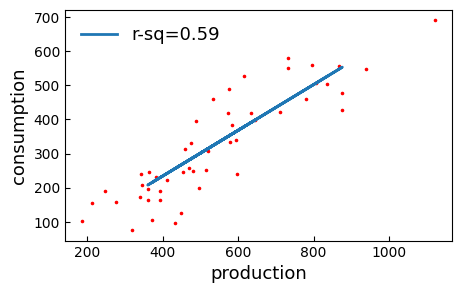

In [29]:
production_data    =    np.asarray(df2["production"].values).reshape(-1,1)
model4    =    LinearRegression()
prod_train, prod_test, prod_con_train, prod_con_test    =    train_test_split(production_data, domestic_consume, random_state=43, test_size=0.25)
model4.fit(prod_train, prod_con_train)
pred_dom_con_from_prod    =    model4.predict(prod_test)
r_sq_4    =    sklearn.metrics.r2_score(prod_con_test, pred_dom_con_from_prod)
###### plotting ################
plt.figure(figsize=figsize)
plt.plot(prod_test, pred_dom_con_from_prod, lw=2, label=f"r-sq={r_sq_4:.2f}")
plt.scatter(production_data, domestic_consume,color="red", s=2.5)
plt.xlabel("production", fontsize=13)
plt.ylabel("consumption", fontsize=13)
plt.tick_params(axis="both", direction='in')
plt.legend(frameon=False, fontsize=13)
plt.show()

Above one sees that consumption and production have a coefficient of determination r-sq = 0.59

In [30]:
##### stack the two predictor variables in a 2d array as follows ###############################################
two_d_predictor    =    np.column_stack((export_data, production_data))
#print(two_d_predictor)
### initialize the linear regression model #####################################
model_multi_linear_reg    =    LinearRegression()
# split the predictor and the response data as train test
exp_prod_train, exp_prod_test, two_d_con_train, two_d_con_test    =    train_test_split(two_d_predictor, domestic_consume, random_state=45, test_size=0.25)
# train the model on the train-split data
model_multi_linear_reg.fit(exp_prod_train, two_d_con_train)
two_d_pred_con    =    model_multi_linear_reg.predict(exp_prod_test)
r_sq_multi_reg    =    sklearn.metrics.r2_score(two_d_con_test, two_d_pred_con)
b0    =    model_multi_linear_reg.intercept_
b1, b2    =    model_multi_linear_reg.coef_
print("intercept:\t", b0)
print("coeff:\t", b1,b2)
print("r_sq:\t", r_sq_multi_reg)

intercept:	 71.48740760428808
coeff:	 0.8488239526484662 0.02603007071850136
r_sq:	 0.984266384220176


so the multiple linear regression, with 2 predictors=[export, production] and 1 response=[domestic_consumption] yields the above intercept and coefficient for the two predictors

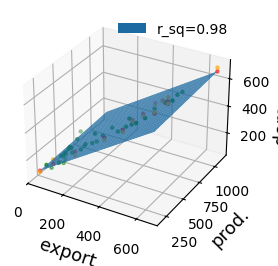

In [31]:
#### for interactive jupyter 3d plot ############
#%matplotlib notebook
############ plotting 3d figure ###########################
exp_test_data    =    exp_prod_test[:,0]
prod_test_data   =    exp_prod_test[:,1]
exp_train_data   =    exp_prod_train[:,0]
prod_train_data  =    exp_prod_train[:,1]
#### create a mesh for 3d plotting ############################
exp_grid, prod_grid    =    np.meshgrid(np.linspace(exp_test_data.min(), exp_test_data.max(),50),
                                       np.linspace(prod_test_data.min(), prod_test_data.max(), 50))
#### evaluating the function y = b0 + b1*x1 + b2*x2 for multiple linear regression ############
two_d_pred_con_for_plotting    =    b0 + b1*exp_grid + b2*prod_grid
figsize    =    (5,3)
fig3d      =    plt.figure(figsize=figsize)
ax    =    fig3d.add_subplot(111, projection="3d")
ax.plot_surface(exp_grid, prod_grid, two_d_pred_con_for_plotting, label=f"r_sq={r_sq_multi_reg:.2f}")
ax.scatter(exp_test_data, prod_test_data, two_d_pred_con, s=5, c="red")
ax.scatter(exp_test_data, prod_test_data, two_d_con_test, s=5, c="orange")
ax.scatter(exp_train_data, prod_train_data, two_d_con_train, s=5, c="green")
ax.set_xlabel("export", fontsize=13)
ax.set_ylabel("prod.", fontsize=13)
ax.set_zlabel("dom. con.", fontsize=13)
ax.legend(frameon=False)
plt.show()

The multiple linear regression for above case shows r-sq value = 0.98. Now, using the python library called statsmodels, one can look at various statistics that characterize a model, eg.: f-statistic, p-value, etc.

In [33]:
import statsmodels.api as sm
stats_model_2d_predictor   =    exp_prod_train
stats_model_2d_predictor   =    sm.add_constant(stats_model_2d_predictor)
sm_multi_model    =    sm.OLS(two_d_con_train, stats_model_2d_predictor).fit()
print(sm_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     408.9
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           5.17e-24
Time:                        21:18:42   Log-Likelihood:                -171.19
No. Observations:                  36   AIC:                             348.4
Df Residuals:                      33   BIC:                             353.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4874     19.215      3.720      0.0

# Variable selection #
In multiple regression, out of multiple predictors, it becomes important to choose those predictors that have significant effect on the response. The process of selecting only those predictors from a dataframe that have significant effect on the response is called Variable selection.

In [42]:
#print(df2.columns)
# the following are the predictors
vs_import_data    =    np.asarray(df2["imports"].values).reshape(-1,1)
vs_export_data    =    np.asarray(df2["exports"].values).reshape(-1,1)
vs_total_supply   =    np.asarray(df2["total_supply"].values).reshape(-1,1)
vs_production     =    np.asarray(df2['production'].values).reshape(-1,1)
vs_feed_residu    =    np.asarray(df2['feed_and_residual'].values).reshape(-1,1)
vs_food_seed_ind  =    np.asarray(df2['food_seed_industrial'].values).reshape(-1,1)
vs_dome_con       =    np.asarray(df2['total_domestic_use'].values).reshape(-1,1)
vs_beg_stocks     =    np.asarray(df2['beginning_stocks'].values).reshape(-1,1)
vs_total_con      =    np.asarray(df2['total_use'].values).reshape(-1,1)
# ending stock will be the response we are looking at
vs_end_stocks     =    np.asarray(df2['ending_stocks'].values).reshape(-1,1)

# stack the predictors together
nine_feature_variable    =    np.column_stack((vs_import_data,vs_export_data,vs_total_supply,vs_production,vs_feed_residu,vs_food_seed_ind,
                                              vs_dome_con,vs_beg_stocks,vs_total_con))
#print(nine_feature_variable)
train_nine, test_nine, train_end_stocks, test_end_stocks    =    train_test_split(nine_feature_variable, vs_end_stocks, random_state=49,
                                                                                 test_size=0.25)
sm_nine_feature    =    train_nine
sm_nine_feature    =    sm.add_constant(sm_nine_feature)
sm_nine_model      =    sm.OLS(train_end_stocks, sm_nine_feature).fit()
print(sm_nine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.608e+27
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:04:08   Log-Likelihood:                 870.76
No. Observations:                  36   AIC:                            -1726.
Df Residuals:                      28   BIC:                            -1713.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.558e-13   9.58e-12      0.027      0.9